In [1]:
import ee
import folium
# Initialize the Earth Engine module.
ee.Initialize()

In [2]:
import rasterio as rio
import numpy as np
import matplotlib.pyplot as plt

In [163]:
##Copied this code from here: https://www.kaggle.com/paultimothymooney/how-to-get-started-with-the-earth-engine-data

def add_ee_layer(self, ee_image_object, vis_params, name):
  # https://github.com/google/earthengine-api/blob/master/python/examples/ipynb/ee-api-colab-setup.ipynb
  map_id_dict = ee.Image(ee_image_object).getMapId(vis_params)
  folium.raster_layers.TileLayer(
    tiles = map_id_dict['tile_fetcher'].url_format,
    attr = 'Map Data &copy; <a href="https://earthengine.google.com/">Google Earth Engine</a>',
    name = name,
    overlay = True,
    control = True
  ).add_to(self)

def plot_ee_data_on_map(dataset,column,begin_date,end_date,minimum_value,maximum_value,latitude,longitude,zoom):
    # https://github.com/google/earthengine-api/blob/master/python/examples/ipynb/ee-api-colab-setup.ipynb
    folium.Map.add_ee_layer = add_ee_layer
    vis_params = {
      'min': minimum_value,
      'max': maximum_value,
      'palette': ['006633', 'E5FFCC', '662A00', 'D8D8D8', 'F5F5F5']}
    my_map = folium.Map(location=[latitude,longitude], zoom_start=zoom, height=500)
    s5p = ee.ImageCollection(dataset).filterDate(
        begin_date, end_date)
    my_map.add_ee_layer(s5p.first().select(column), vis_params, 'Color')
    my_map.add_child(folium.LayerControl())
    display(my_map)


In [7]:
dataset = "NASA/GLDAS/V021/NOAH/G025/T3H"
column = 'Tair_f_inst'
begin_date = '2018-07-08'
end_date = '2018-07-14'
minimum_value = 270
maximum_value = 310
latitude = 18.20
longitude = -66.66
zoom = 6
plot_ee_data_on_map(dataset,column,begin_date,end_date,minimum_value,maximum_value,latitude,longitude,zoom)

In [193]:
llx = 30
lly = 0
urx = 40
ury = 50
geometry = ee.Geometry.Rectangle([llx, lly, urx, ury])
geometry = geometry['coordinates'][0]

# dataset = "NASA/GLDAS/V021/NOAH/G025/T3H"
# column = 'Tair_f_inst'
# begin_date = '2018-07-08'
# end_date = '2018-07-14'

task_config = {
    'region': geometry
    }

collection = ee.ImageCollection('COPERNICUS/S5P/OFFL/L3_NO2').select('NO2_column_number_density').filterDate('2018-07-08', '2018-07-14')


collectionList = collection.toList(collection.size())
collectionSize = collectionList.size().getInfo()
image = ee.Image(collectionList.get(1))
##print(image.get(1))

#print(image.getInfo)
task = ee.batch.Export.image.toDrive(image, description='test6', region=image.geometry().bounds().getInfo()["coordinates"], scale = )

#task.start()

AttributeError: 'function' object has no attribute 'geometry'

In [190]:
# Load an image.
image = ee.Image('LANDSAT/LC08/C01/T1_TOA/LC08_044034_20140318')
mapid = image.getMapId({
    'bands': ['B4', 'B3', 'B2'], 
    'min': 0, 
    'max': 0.3})

# Display the map with folium!
Mapdisplay(center, {'Median Composite':mapid},zoom_start=8)

NameError: name 'Mapdisplay' is not defined

In [186]:
image = ee.Image('LANDSAT/LC08/C01/T1_TOA/LC08_044034_20140318');

#Define the visualization parameters.
vizParams = {
  'bands': ['B5', 'B4', 'B3'],
  'min': 0,
  'max': 0.5,
  'gamma': [0.95, 1.1, 1]
};

#Center the map and display the image.
Map.setCenter(-122.1899, 37.5010, 10); # San Francisco Bay
Map.addLayer(image, vizParams, 'false color composite');

NameError: name 'Map' is not defined

TypeError: Image data of dtype object cannot be converted to float

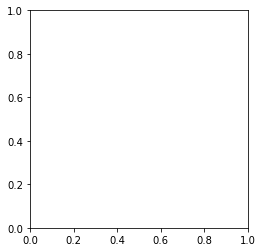

In [176]:
f = plt.figure()
plt.imshow(image)    
plt.show()

plt.imshow(image)

In [217]:
Collection = ee.ImageCollection('COPERNICUS/S5P/OFFL/L3_NO2')

# This is OK for small collections
collectionList = Collection.toList(Collection.size())


#print(dir(collectionList) )

In [218]:
collection = ee.ImageCollection('COPERNICUS/S5P/OFFL/L3_NO2')
list = collection.toList(10)
#print(list.getInfo())

In [83]:
geometry

[[-180, 90], [-180, -90], [180, -90], [180, 90]]

In [132]:
task.status()

{'state': 'COMPLETED',
 'description': 'test5',
 'creation_timestamp_ms': 1583278511896,
 'update_timestamp_ms': 1583278529338,
 'start_timestamp_ms': 1583278522239,
 'task_type': 'EXPORT_IMAGE',
 'destination_uris': ['https://drive.google.com/'],
 'id': 'GN5QLBZDSF4X5BKIP2TLEMUH',
 'name': 'projects/earthengine-legacy/operations/GN5QLBZDSF4X5BKIP2TLEMUH'}

In [4]:
def plot_scaled(file_name):
    vmin, vmax = np.nanpercentile(file_name, (5,95))  # 5-95% stretch
    img_plt = plt.imshow(file_name, cmap='gray', vmin=vmin, vmax=vmax)
    plt.show()

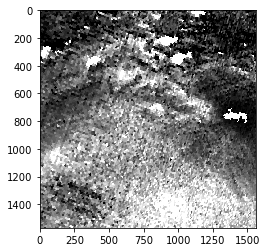

In [244]:
image = '../data/no2/test25.tif'
image_band = rio.open(image).read(1)
plot_scaled(image_band)
# overlay_image_on_puerto_rico(image,band_layer=3)

In [235]:
image_band

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

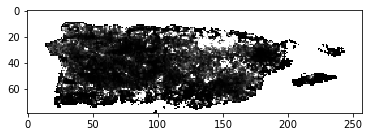

In [ ]:
image = '../data/starter_pack/s5p_no2/s5p_no2_20180708T172237_20180714T190743.tif'
image_band = rio.open(image).read(1)
plot_scaled(image_band)
#overlay_image_on_puerto_rico(image,band_layer=1)

In [238]:
image_band

array([[4.97411129e-05, 4.97411129e-05, 4.97411129e-05, ...,
        5.18101369e-05, 5.18101369e-05, 5.18101369e-05],
       [4.97411129e-05, 4.97411129e-05, 4.97411129e-05, ...,
        5.18101369e-05, 5.18101369e-05, 5.18101369e-05],
       [4.97411129e-05, 4.97411129e-05, 4.97411129e-05, ...,
        5.18101369e-05, 5.18101369e-05, 5.18101369e-05],
       ...,
       [5.29969898e-05, 4.88642554e-05, 4.88642554e-05, ...,
        4.87411053e-05, 4.87411053e-05, 4.87411053e-05],
       [5.29969898e-05, 4.88642554e-05, 4.88642554e-05, ...,
        4.87411053e-05, 4.87411053e-05, 4.87411053e-05],
       [5.19556609e-05, 4.88531332e-05, 4.88531332e-05, ...,
        4.87411053e-05, 4.87411053e-05, 4.87411053e-05]])

In [15]:
def preview_meta_data(file_name):
    with rio.open(file_name) as img_filename:
        print('Metadata for: ',file_name)
        print('Bounding Box:',img_filename.bounds)
        print('Resolution:',img_filename.res)
        print('Tags:',img_filename.tags())
        print('More Tags:',img_filename.tags(ns='IMAGE_STRUCTURE'))
        print('Number of Channels =',img_filename.count,'\n')

In [231]:
preview_meta_data('../data/no2/test18.tif')

Metadata for:  ../data/no2/test18.tif
Bounding Box: BoundingBox(left=-98.00178086557007, bottom=33.02777993566793, right=-92.99816473302434, top=29.991474275343947)
Resolution: (0.008983152841195215, -0.008983152841195215)
Tags: {'AREA_OR_POINT': 'Area'}
More Tags: {'COMPRESSION': 'LZW', 'INTERLEAVE': 'PIXEL'}
Number of Channels = 12 



In [232]:
preview_meta_data('../data/starter_pack/s5p_no2/s5p_no2_20180708T172237_20180714T190743.tif')

Metadata for:  ../data/starter_pack/s5p_no2/s5p_no2_20180708T172237_20180714T190743.tif
Bounding Box: BoundingBox(left=-67.32431391288841, bottom=18.564903861343627, right=-65.19081511310455, top=17.90015055109518)
Resolution: (0.004491576420597608, -0.004491576420597608)
Tags: {'AREA_OR_POINT': 'Area'}
More Tags: {'COMPRESSION': 'LZW', 'INTERLEAVE': 'PIXEL'}
Number of Channels = 12 



Get population data:

In [9]:
##Use Google Earth Engine Interface:
# // Load an image
# var getimage = ee.ImageCollection("CIESIN/GPWv411/GPW_Basic_Demographic_Characteristics").first();

# // Create a geometry representing an export region.
# var geometry = ee.Geometry.Rectangle([-67.4, 17.9, -65.1, 18.6])

# // Export the image, specifying scale and region.
# Export.image.toDrive({
# image: getimage,
# description: 'imageToDriveExample',
# scale: 500,
# region: geometry
# });

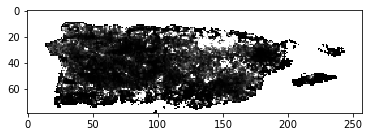

In [12]:
image = '../data/supplementary_data/tif/ds4g_population.tif'
image_band = rio.open(image).read(1)
plot_scaled(image_band)
#overlay_image_on_puerto_rico(image,band_layer=1)

In [16]:
preview_meta_data('../data/supplementary_data/tif/ds4g_population.tif')

Metadata for:  ../data/ds4g_population.tif
Bounding Box: BoundingBox(left=-67.40516228845917, bottom=17.892232143725924, right=-65.096492008272, top=18.601901218180345)
Resolution: (0.008983152841195215, 0.008983152841195215)
Tags: {'AREA_OR_POINT': 'Area'}
More Tags: {'COMPRESSION': 'LZW', 'INTERLEAVE': 'BAND'}
Number of Channels = 1 



Get night time lights data:

In [ ]:
##Use Google Earth Engine Interface:
# // Create a geometry representing an export region.
# var geometry = ee.Geometry.Rectangle([-67.4, 17.9, -65.1, 18.6])

# // Load an image
# var getimagecollection = ee.ImageCollection("NOAA/VIIRS/DNB/MONTHLY_V1/VCMSLCFG")
#       .filterDate('2018-07-01', '2019-07-01')
#       .filterBounds(geometry);

# var imageselect = getimagecollection.select('avg_rad').first();

# // var getimage = ee.Image(imageselect).first();


# // Export the image, specifying scale and region.
# Export.image.toDrive({
# image: imageselect,
# description: 'ds4g_nighttime_lights2',
# scale: 1000,
# region: geometry,
# });

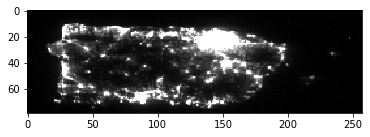

In [8]:
image = '../data/supplementary_data/tif/ds4g_nighttime_lights.tif'
image_band = rio.open(image).read(1)
plot_scaled(image_band)
#overlay_image_on_puerto_rico(image,band_layer=1)

Get Landcover Data:

In [ ]:
##Use Google Earth Engine Interface:
# // Create a geometry representing an export region.
# var geometry = ee.Geometry.Rectangle([-67.4, 17.9, -65.1, 18.6])

# // Load an image
# var getimage = ee.Image("USGS/GFSAD1000_V1")

# var imageselect = getimage.select('landcover');

# // var getimage = ee.Image(imageselect).first();


# // Export the image, specifying scale and region.
# Export.image.toDrive({
# image: imageselect,
# description: 'ds4g_landcover',
# scale: 1000,
# region: geometry,
# });

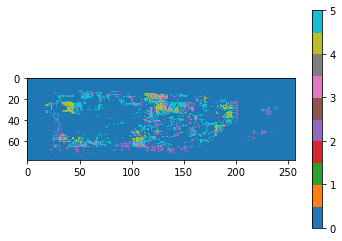

In [44]:
image = '../data/supplementary_data/tif/ds4g_landcover.tif'
image_band = rio.open(image).read(1)
bounds = np.arange(0,10,1)
plt.imshow(image_band, cmap='tab10', vmin=0, vmax=5)
plt.colorbar()
#overlay_image_on_puerto_rico(image,band_layer=1)

In [36]:
image_band.min()

0